# Import the Libarary

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
import seaborn as sns


# Loading data and Inspect data

In [2]:
df_user = pd.read_csv('relax_challenge/takehome_users.csv', encoding = 'latin-1', parse_dates = True)
df_engagement = pd.read_csv('relax_challenge/takehome_user_engagement.csv', parse_dates = True)

In [3]:
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [5]:
df_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [7]:
df_engagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


# Preprocessing Data for df_engagement

In [8]:
# Convert to datatime data type for df_user
df_user['creation_time'] = pd.to_datetime(df_user.creation_time)

In [9]:
# Convert to datatime data type for df_engagement
df_engagement['Date'] = pd.to_datetime(df_engagement.time_stamp)
df_engagement.drop('time_stamp', axis = 1, inplace = True)

In [10]:
## Separate the YEAR, MONTH, DAY, WEEKNUM from the datime 
df_engagement['Year'] = df_engagement['Date'].dt.year
df_engagement['Month'] = df_engagement['Date'].dt.month
df_engagement['Day'] = df_engagement['Date'].dt.day
df_engagement['Weeknum'] = df_engagement['Date'].dt.week

- We know our problem statement is defind the Adopted user
  - have Log in 3 separated day
  - With in the 7 day period

In [11]:
## Count the time log in of each user for each week. of the year
df_temp_1 = pd.DataFrame(df_engagement.groupby(['user_id','Year','Month','Day'])['visited'].count())
df_temp_1.columns = ['total_visit']
df_temp_1.reset_index(inplace = True)
df_temp_1.head(5)

,user_id,Year,Month,Day,total_visit
0,1,2014,4,22,1
1,2,2013,11,15,1
2,2,2013,11,29,1
3,2,2013,12,9,1
4,2,2013,12,25,1


In [12]:
df_temp_1.describe()

,user_id,Year,Month,Day,total_visit
count,207917.000000,207917.000000,207917.000000,207917.000000,207917.0
mean,5913.314197,2013.377468,5.930112,15.799117,1.0
std,3394.941674,0.590782,3.529426,8.807596,0.0
min,1.000000,2012.000000,1.000000,1.000000,1.0
25%,3087.000000,2013.000000,3.000000,8.000000,1.0
50%,5682.000000,2013.000000,5.000000,16.000000,1.0
75%,8944.000000,2014.000000,9.000000,23.000000,1.0
max,12000.000000,2014.000000,12.000000,31.000000,1.0


- We check use if we have any user log in more than 1 a day: 
    - Look at statistic table, you can tell that 1 user only log in 1 per day
- So we get the week num for each year, and treat it as 7 day period
    - We count the number of each 7 period for each user on each year.
    - It can help us to identify the Adopted-user

In [13]:
df_temp_2 = pd.DataFrame(df_engagement.groupby(['user_id','Year','Weeknum'])['visited'].count())
df_temp_2.columns = ['total_visit']
df_temp_2.reset_index(inplace = True)
df_temp_2.head()

,user_id,Year,Weeknum,total_visit
0,1,2014,17,1
1,2,2013,1,1
2,2,2013,46,1
3,2,2013,48,1
4,2,2013,50,1


In [14]:
df_temp_2.describe()

,user_id,Year,Weeknum,total_visit
count,69277.000000,69277.000000,69277.000000,69277.000000
mean,5946.034312,2013.290573,24.181922,3.001241
std,3434.824837,0.631043,15.353985,2.020415
min,1.000000,2012.000000,1.000000,1.000000
25%,3066.000000,2013.000000,11.000000,1.000000
50%,5795.000000,2013.000000,21.000000,2.000000
75%,8955.000000,2014.000000,38.000000,4.000000
max,12000.000000,2014.000000,52.000000,8.000000


- df_temp_2 give our information
    - Total visit for each Year of each week number
    - But we need overall for every year not just that one year, it may get this year was not but it was for next year

- So we just only take the max of total visit to get the max number of visit in period 7

In [61]:
## Get the maximun total_vist for different week and year.
## Cause our problem as identify adopted user was log in three different day for in period 7 day
df_temp_3 = pd.DataFrame(df_temp_2.groupby('user_id')['total_visit'].max())
df_temp_3.columns = ['total_visit']

In [62]:
df_temp_3.head()

,total_visit
user_id,
1,1
2,3
3,1
4,1
5,1


In [70]:
user_login_per_week= pd.DataFrame(df_temp_3.total_visit.value_counts())
user_login_per_week.T

,1,2,7,3,5,6,4,8
total_visit,6821,558,480,282,235,223,219,5


In [71]:
## Identified Adopted User
## If the user have number login in the a week greater than 3 is adopted user
df_temp_3['Adopted_user'] = df_temp_3['total_visit'].apply(lambda x: 1 if x >= 3 else 0)

In [72]:
df_temp_3.drop('total_visit', axis = 1, inplace = True)

In [73]:

df_temp_3.head()

,Adopted_user
user_id,
1,0
2,1
3,0
4,0
5,0


# Preprocessing data for df_user

In [74]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


#### We need 
    - object_id
    - creation_source
    - opted_in_to_mailing_list
    - enable_for_marketing_drop
    - org_id

#### we dont need:
    - email:  because we know our data have email for everyone
    - name and because it not help us for predict adopted user.
    - invited_by_user_id: because it missing over 40%


In [77]:
df_user_1 = pd.DataFrame(df_user[['object_id','creation_source', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip','org_id']])

In [78]:
list_name = df_user_1.creation_source.unique()

In [79]:
## Create the dumpmy numerical data for category columns creation_source
for i in list_name:
    df_user_1['is_' + i] = df_user_1['creation_source'].apply(lambda x: 1 if x == i else 0)

In [80]:
df_user_2 = df_user_1.drop('creation_source', axis= 1)

In [81]:
df_user_2.head()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,is_GUEST_INVITE,is_ORG_INVITE,is_SIGNUP,is_PERSONAL_PROJECTS,is_SIGNUP_GOOGLE_AUTH
0,1,1,0,11,1,0,0,0,0
1,2,0,0,1,0,1,0,0,0
2,3,0,0,94,0,1,0,0,0
3,4,0,0,1,1,0,0,0,0
4,5,0,0,193,1,0,0,0,0


# Merge 2 data frame togther 
 - Before we choice with feature 1 for adopted user

In [82]:
df_final = df_user_2.merge(df_temp_3, left_on ='object_id', right_on='user_id')

In [83]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 10 columns):
object_id                     8823 non-null int64
opted_in_to_mailing_list      8823 non-null int64
enabled_for_marketing_drip    8823 non-null int64
org_id                        8823 non-null int64
is_GUEST_INVITE               8823 non-null int64
is_ORG_INVITE                 8823 non-null int64
is_SIGNUP                     8823 non-null int64
is_PERSONAL_PROJECTS          8823 non-null int64
is_SIGNUP_GOOGLE_AUTH         8823 non-null int64
Adopted_user                  8823 non-null int64
dtypes: int64(10)
memory usage: 758.2 KB


In [84]:
df_final.Adopted_user.value_counts()

0    7379
1    1444
Name: Adopted_user, dtype: int64

In [85]:
df_final.head(15)

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,is_GUEST_INVITE,is_ORG_INVITE,is_SIGNUP,is_PERSONAL_PROJECTS,is_SIGNUP_GOOGLE_AUTH,Adopted_user
0,1,1,0,11,1,0,0,0,0,0
1,2,0,0,1,0,1,0,0,0,1
2,3,0,0,94,0,1,0,0,0,0
3,4,0,0,1,1,0,0,0,0,0
4,5,0,0,193,1,0,0,0,0,0
5,6,0,0,197,1,0,0,0,0,0
6,7,0,1,37,0,0,1,0,0,0
7,10,1,1,318,0,1,0,0,0,1
8,11,0,0,69,0,0,1,0,0,0
9,13,0,0,254,0,1,0,0,0,0


# Select the best feature for predict the Adopted user


In [86]:
X = df_final.drop(['object_id','Adopted_user'],axis = 1)
y = df_final['Adopted_user']

- I used SelectKBest method to selected the best feature for predict the adopted user
- And use f_classif because want compare individually of each feature to the target
- It return the score for each individual

In [96]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [97]:
skb = SelectKBest(f_classif, k='all')
skb.fit(X,y)

SelectKBest(k='all', score_func=<function f_classif at 0x1208f29d8>)

In [98]:
New_data = skb.transform(X)

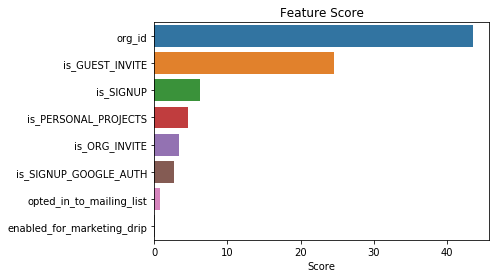

In [99]:
feature_df = pd.DataFrame(skb.scores_, index = X.columns)
feature_df.columns = ['Score']
feature_df.sort_values(by= 'Score', ascending = False, inplace = True)
_ = sns.barplot(x= 'Score', y= feature_df.index, data = feature_df)
_ = plt.title('Feature Score')

# Best feature base on the machine model

In [100]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
rf = RandomForestClassifier()
rf.fit(Xtrain, ytrain)
y_predict = rf.predict(Xtest)

In [103]:
rf.score(Xtest, ytest)

0.7756373937677054

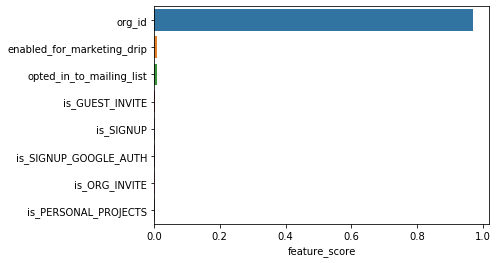

In [104]:
new_data = pd.DataFrame(rf.feature_importances_, index = X.columns)
new_data.columns = ['feature_score']
new_data.sort_values(by = 'feature_score',ascending = False, inplace = True)
_= sns.barplot(x='feature_score', y = new_data.index, data = new_data )